In [186]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [144]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [145]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage" ,
    shuffle=True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [146]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [147]:
len(dataset)

68

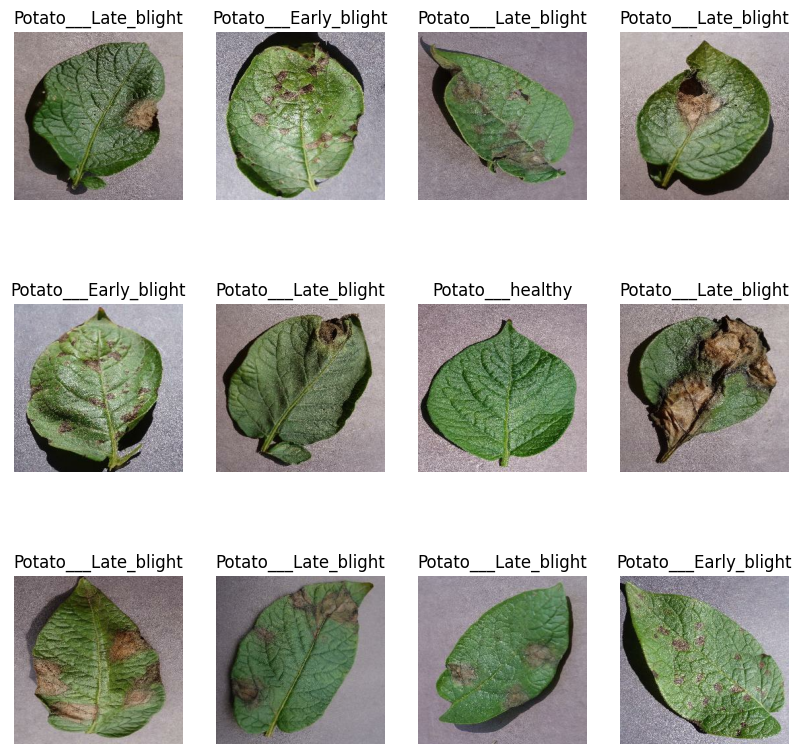

In [148]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [149]:
len(dataset)

68

80% ==> training
20% ==> 10% validation, 10% test 

In [150]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [151]:
train_ds = dataset.take(54)
len(train_ds)

54

In [152]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [153]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [154]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [155]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [156]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).take(val_size)

    return train_ds, val_ds, test_ds

In [157]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [158]:
len(train_ds)

54

In [159]:
len(val_ds)

6

In [160]:
len(test_ds)

6

In [161]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [162]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [163]:
data_augementation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(factor=0.055, fill_mode='constant',fill_value=0.),
])

In [164]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augementation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape = input_shape)

In [165]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_13 (Sequential)  (32, 256, 256, 3)         0         
                                                                 
 sequential_14 (Sequential)  (32, 256, 256, 3)         0         
                                                                 
 conv2d_33 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_33 (MaxPooli  (32, 127, 127, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_34 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_34 (MaxPooli  (32, 62, 62, 64)          0         
 ng2D)                                               

In [166]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [168]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 48s 894ms/step - loss: 0.0183 - accuracy: 0.9931 - val_loss: 0.0121 - val_accuracy: 1.0000
Epoch 2/50
54/54 [==============================] - 42s 773ms/step - loss: 0.0216 - accuracy: 0.9942 - val_loss: 0.1373 - val_accuracy: 0.9635
Epoch 3/50
54/54 [==============================] - 39s 716ms/step - loss: 0.0072 - accuracy: 0.9971 - val_loss: 0.0204 - val_accuracy: 0.9896
Epoch 4/50
54/54 [==============================] - 39s 731ms/step - loss: 0.0909 - accuracy: 0.9734 - val_loss: 0.0578 - val_accuracy: 0.9740
Epoch 5/50
54/54 [==============================] - 35s 642ms/step - loss: 0.0174 - accuracy: 0.9942 - val_loss: 0.0191 - val_accuracy: 0.9896
Epoch 6/50
54/54 [==============================] - 35s 652ms/step - loss: 0.0183 - accuracy: 0.9942 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 7/50
54/54 [==============================] - 35s 656ms/step - loss: 0.0268 - accuracy: 0.9902 - val_loss: 0.0699 - val_accuracy: 0.9792

In [169]:
scores = model.evaluate(test_ds)

6/6 [==============================] - 8s 364ms/step - loss: 0.0015 - accuracy: 1.0000


In [170]:
scores

[0.0015123668126761913, 1.0]

In [171]:
history

In [172]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [176]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [178]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

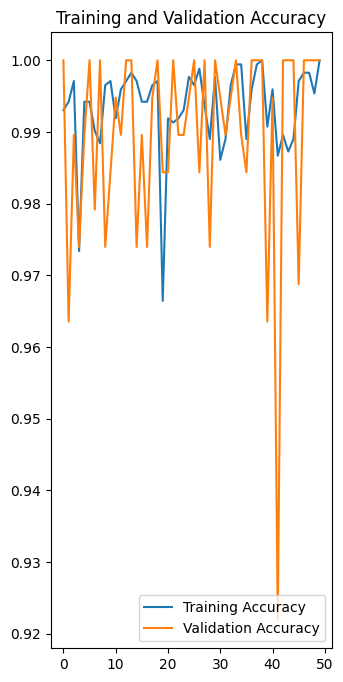

In [179]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc ='lower right')
plt.title('Training and Validation Accuracy')

first image to predict
actual label:  Potato___Early_blight
1/1 [==============================] - 0s 411ms/step
predicted label:  Potato___Early_blight


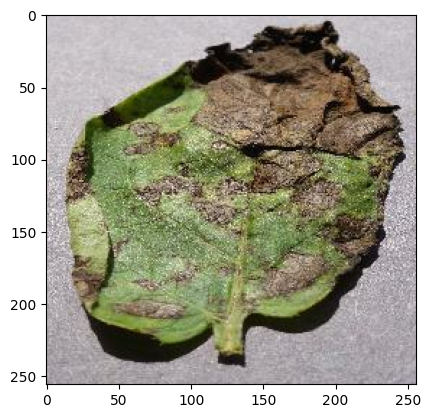

In [180]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label: ",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label: ", class_names[np.argmax(batch_prediction[0])])

In [192]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = np.max(predictions[0]) * 100  # Assuming the confidence is the highest prediction probability
    return predicted_class, confidence

1/1 [==============================] - 0s 32ms/step


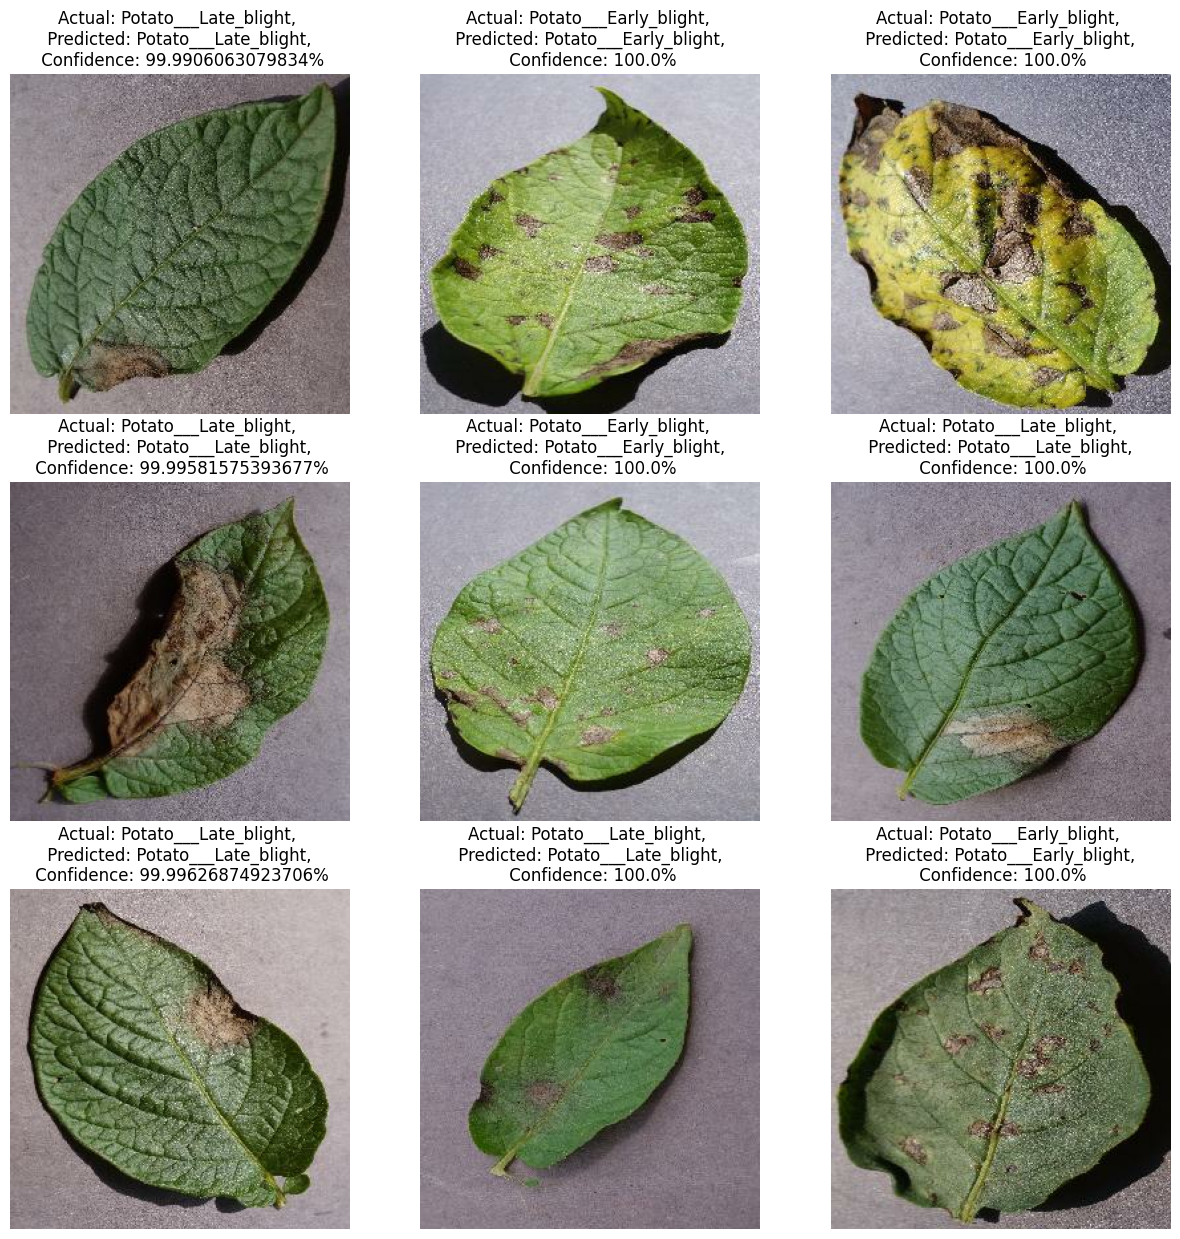

In [193]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}, \n Confidence: {confidence}%")
        plt.axis("off")
        plt.show

In [195]:
import os
max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets
